In [3]:
from google.colab import drive
drive. mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install tensorflow

In [5]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/cats_vs_dogs_small.zip","r") as dataset_zip:
    dataset_zip.extractall("/content")

In [6]:
import os
base_data = "/content/cats_vs_dogs_small"
print( "Contents of the base directory:", os.listdir(base_data))

Contents of the base directory: ['train', 'test', 'validation']


In [7]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications

# Establishing the dataset_results function's proper path

train_path = '/content/cats_vs_dogs_small/train'
valid_path = '/content/cats_vs_dogs_small/validation'
test_path = '/content/cats_vs_dogs_small/test'

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [8]:
# Importing the dataset from defined directories

ds_train = keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(180, 180),
    batch_size=32)

ds_val = keras.preprocessing.image_dataset_from_directory(
    valid_path,
    image_size=(180, 180),
    batch_size=32)

ds_test = keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
# Display of the sample images from the given dataset

def display_images(data_set):
    plt.figure(figsize=(10, 10))
    for imgs, lbls in data_set.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(imgs[i].numpy().astype("uint8"))


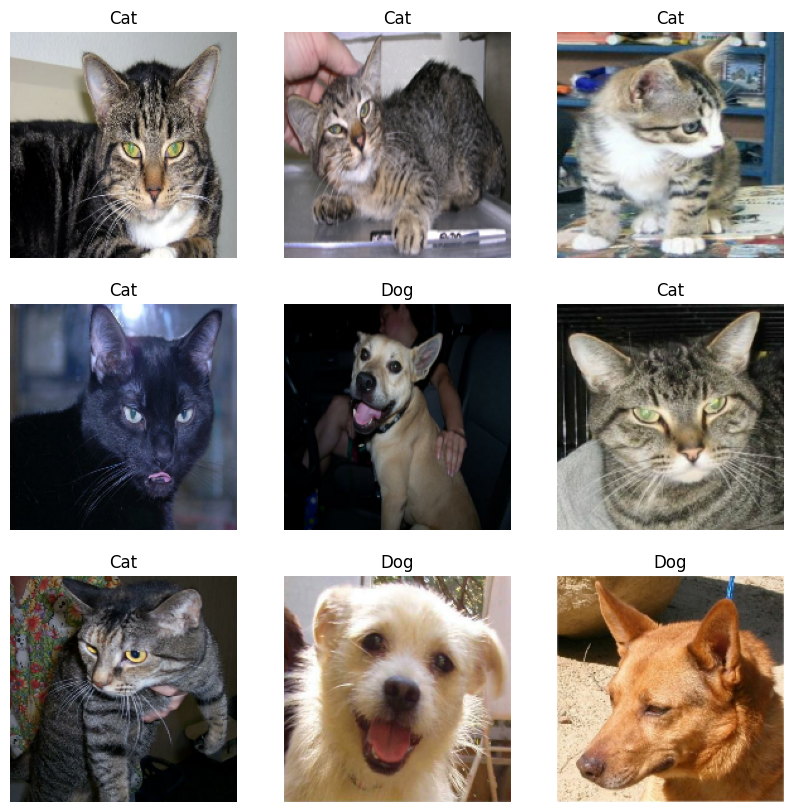

In [10]:
# Visualizing sample images from the training dataset

def display_images(data_set):
    plt.figure(figsize=(10, 10))
    for imgs, lbls in data_set.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(imgs[i].numpy().astype("uint8"))
            plt.title("Cat" if lbls[i] == 0 else "Dog")
            plt.axis("off")
    plt.show()

# Executing the function to visualize images

display_images(ds_train)

In [11]:
# Function to define and compile a CNN model from scratch

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [12]:
# Function to perform data augmentation and preprocessing with adjustable sample size

def create_data_flows(train_path, valid_path, batch_size, num_samples=None):
    train_gen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    flow_train = train_gen.flow_from_directory(
        train_path,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    flow_valid = valid_gen.flow_from_directory(
        valid_path,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    return flow_train, flow_valid


In [13]:
# Function to train the CNN model using training and validation generators

def train_model(model, flow_train, flow_valid, num_epochs=30):
    training_history = model.fit(
        flow_train,
        validation_data=flow_valid,
        epochs=num_epochs                # Using 'num_epochs' as the input parameter
    )
    return training_history


In [14]:
# Step 1: Firstly, training the CNN model from scratch using 1000 samples

flow_train_1, flow_valid_1 = create_data_flows(train_path, valid_path, batch_size=32, num_samples=1000)

model_A = create_cnn_model()

history_A = train_model(model_A, flow_train_1, flow_valid_1)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - accuracy: 0.5253 - loss: 1.1634 - val_accuracy: 0.5530 - val_loss: 0.6661
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.5859 - loss: 0.6647 - val_accuracy: 0.5580 - val_loss: 0.6585
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.6001 - loss: 0.6628 - val_accuracy: 0.5870 - val_loss: 0.6665
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.5954 - loss: 0.6740 - val_accuracy: 0.5960 - val_loss: 0.6515
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.6160 - loss: 0.6578 - val_accuracy: 0.6710 - val_loss: 0.6029
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.6533 - loss: 0.6242 - val_accuracy: 0.6500 - val_loss: 0.6253
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.6388 - loss: 0.6375 - val_accuracy: 0.6570 - val_loss: 0.6106
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.6871 - loss: 0.5961 - val_accu

In [15]:
# Step 2: Increasing the training samples from 1000 to 1500

flow_train_2, flow_valid_2 = create_data_flows(train_path, valid_path, batch_size=32, num_samples=1500)

model_B = create_cnn_model()

history_B = train_model(model_B, flow_train_2, flow_valid_2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - accuracy: 0.5163 - loss: 0.9466 - val_accuracy: 0.5000 - val_loss: 0.7127
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.5059 - loss: 0.6940 - val_accuracy: 0.5280 - val_loss: 0.6823
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.5450 - loss: 0.6680 - val_accuracy: 0.5880 - val_loss: 0.6486
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.5737 - loss: 0.6561 - val_accuracy: 0.6090 - val_loss: 0.6420
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.6210 - loss: 0.6467 - val_accuracy: 0.6140 - val_loss: 0.6307
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.6295 - loss: 0.6403 - val_accuracy: 0.6290 - val_loss: 0.6351
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.6407 - loss: 0.6448 - val_accuracy: 0.6570 - val_loss: 0.6174
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.6311 - loss: 0.6415 - val_accu

In [16]:
# Step 3: Train the model using the complete set of 2000 samples

flow_train_3, flow_valid_3 = create_data_flows(train_path, valid_path, batch_size=32, num_samples=2000)

model_C = create_cnn_model()

history_C = train_model(model_C, flow_train_3, flow_valid_3)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - accuracy: 0.5030 - loss: 1.1311 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.4832 - loss: 0.6943 - val_accuracy: 0.5800 - val_loss: 0.6865
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.5168 - loss: 0.6937 - val_accuracy: 0.4990 - val_loss: 0.6934
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 0.5076 - loss: 0.6935 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 0.4902 - loss: 0.6930 - val_accuracy: 0.5210 - val_loss: 0.6982
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.5240 - loss: 0.6900 - val_accuracy: 0.5400 - val_loss: 0.6902
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.5407 - loss: 0.6887 - val_accuracy: 0.5650 - val_loss: 0.6808
Epoch 8/30
63

In [17]:
# Step 4: Use a pretrained CNN model (VGG16 as the base)

def create_pretrained_model():
    base_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
    base_model.trainable = False  # Freeze the convolutional base

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [18]:
# Repeat training with the pretrained CNN model for all sample sizes

model_P1 = create_pretrained_model()
history_P1 = train_model(model_P1, flow_train_1, flow_valid_1)

model_P2 = create_pretrained_model()
history_P2 = train_model(model_P2, flow_train_2, flow_valid_2)

model_P3 = create_pretrained_model()
history_P3 = train_model(model_P3, flow_train_3, flow_valid_3)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6454 - loss: 1.4172 - val_accuracy: 0.8680 - val_loss: 0.3104
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 998ms/step - accuracy: 0.8365 - loss: 0.3583 - val_accuracy: 0.8860 - val_loss: 0.2589
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 997ms/step - accuracy: 0.8565 - loss: 0.3346 - val_accuracy: 0.8950 - val_loss: 0.2633
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 997ms/step - accuracy: 0.8584 - loss: 0.3253 - val_accuracy: 0.9110 - val_loss: 0.2220
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 999ms/step - accuracy: 0.8806 - loss: 0.2771 - val_accuracy: 0.9040 - val_loss: 0.2526
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 996ms/step - accuracy: 0.8738 - loss: 0.3019 - val_accuracy: 0.9000 - val_loss: 0.2289
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 997ms/step - accuracy: 0.8938 - loss: 0.2610 - val_accuracy: 0.8870 - val_loss: 0.2837
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 998ms/s

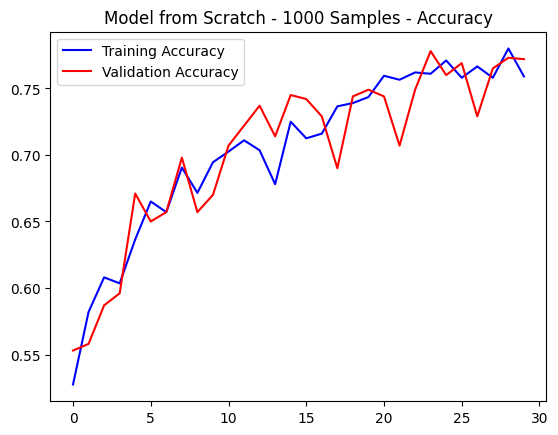

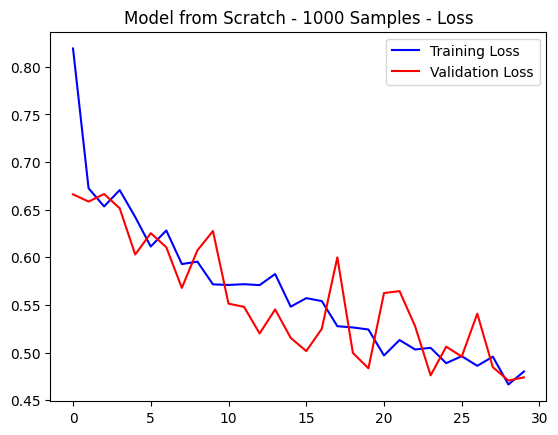

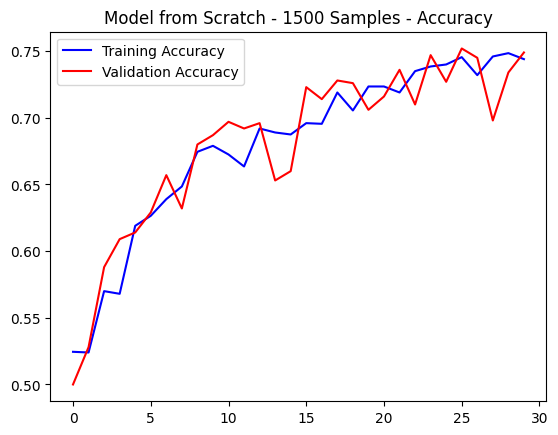

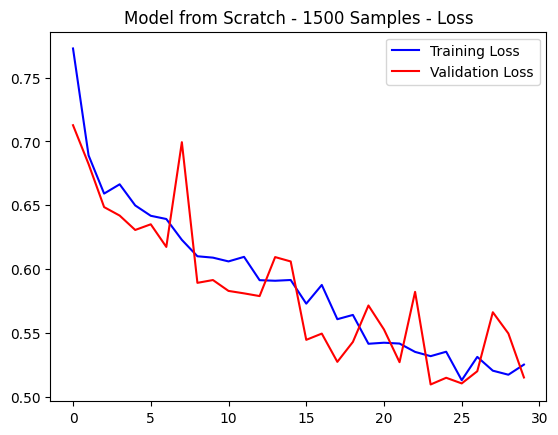

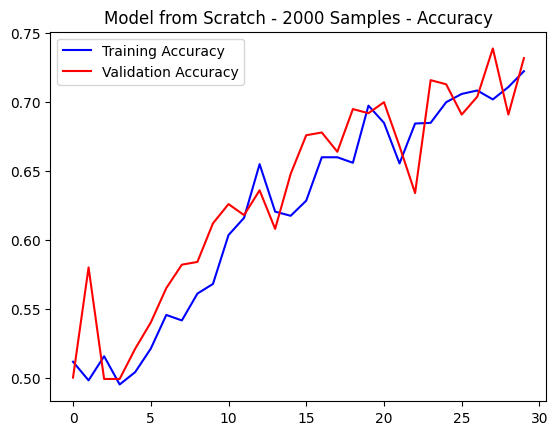

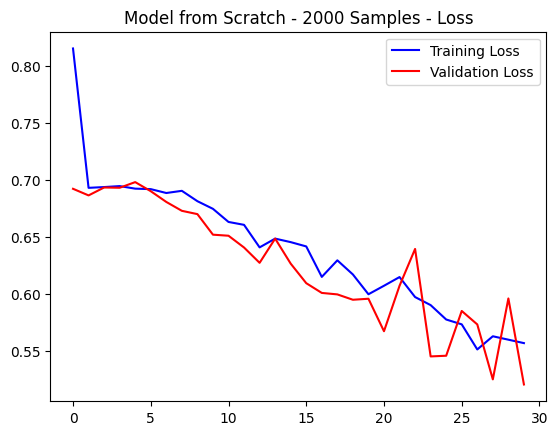

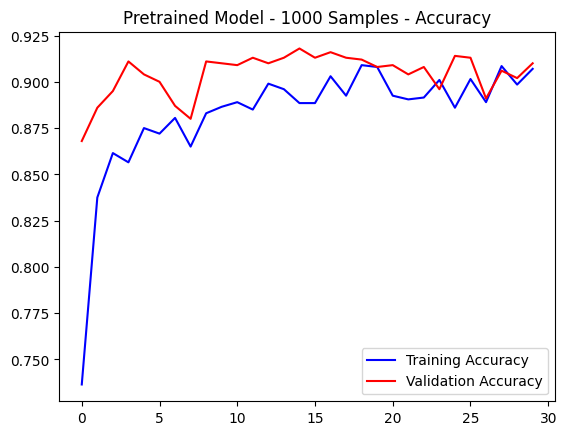

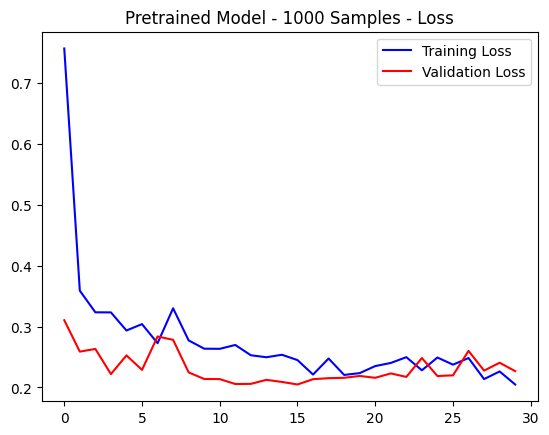

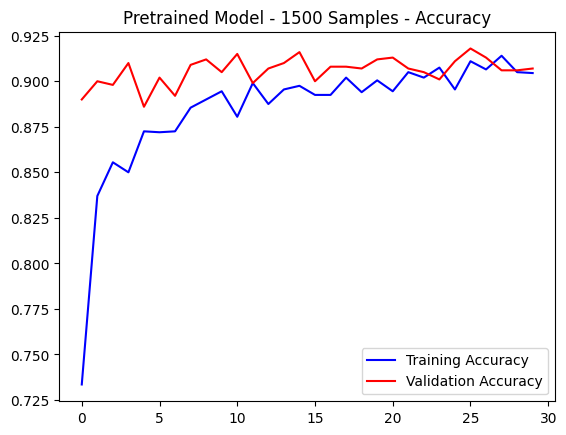

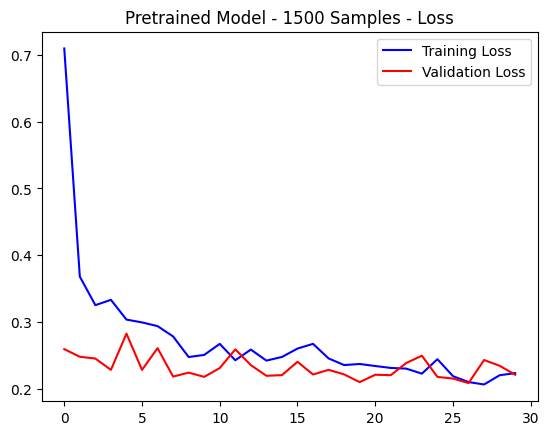

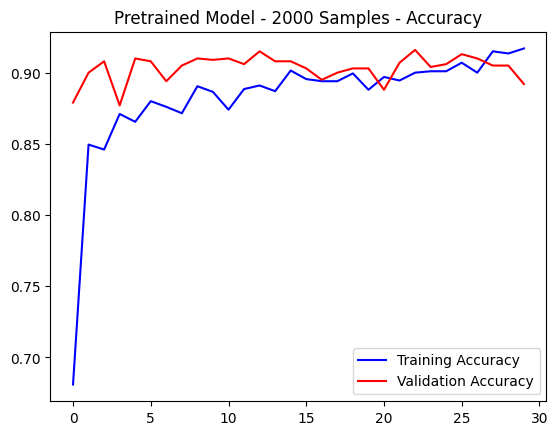

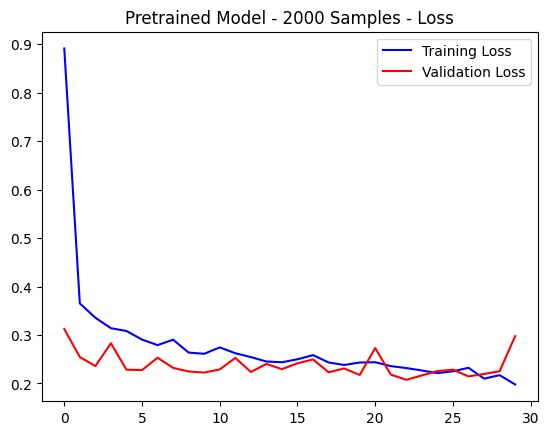

In [19]:
# Function to visualize training and validation performance metrics

def visualize_performance(training_history, title):
    acc = training_history.history['accuracy']
    val_acc = training_history.history['val_accuracy']
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure()
    plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs_range, loss, 'b', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
    plt.title(title + ' - Loss')
    plt.legend()
    plt.show()


# Visualizing the performance for all trained models

visualize_performance(history_A, 'Model from Scratch - 1000 Samples')
visualize_performance(history_B, 'Model from Scratch - 1500 Samples')
visualize_performance(history_C, 'Model from Scratch - 2000 Samples')
visualize_performance(history_P1, 'Pretrained Model - 1000 Samples')
visualize_performance(history_P2, 'Pretrained Model - 1500 Samples')
visualize_performance(history_P3, 'Pretrained Model - 2000 Samples')


In [20]:
# Function to aggregate and summarize final performance metrics from multiple models

def summarize_results(all_histories, model_labels):
    results_summary = {}

    for i, history in enumerate(all_histories):
        # Extract final epoch metrics from training history
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]

        results_summary[model_labels[i]] = {
            'Final Training Accuracy': final_train_acc,
            'Final Validation Accuracy': final_val_acc,
            'Final Training Loss': final_train_loss,
            'Final Validation Loss': final_val_loss,
        }

    return results_summary


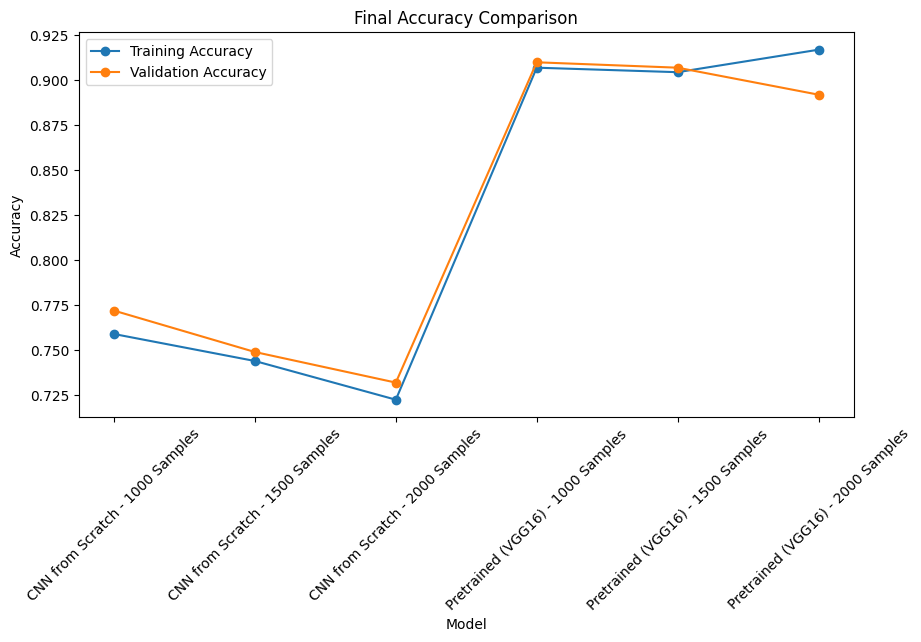

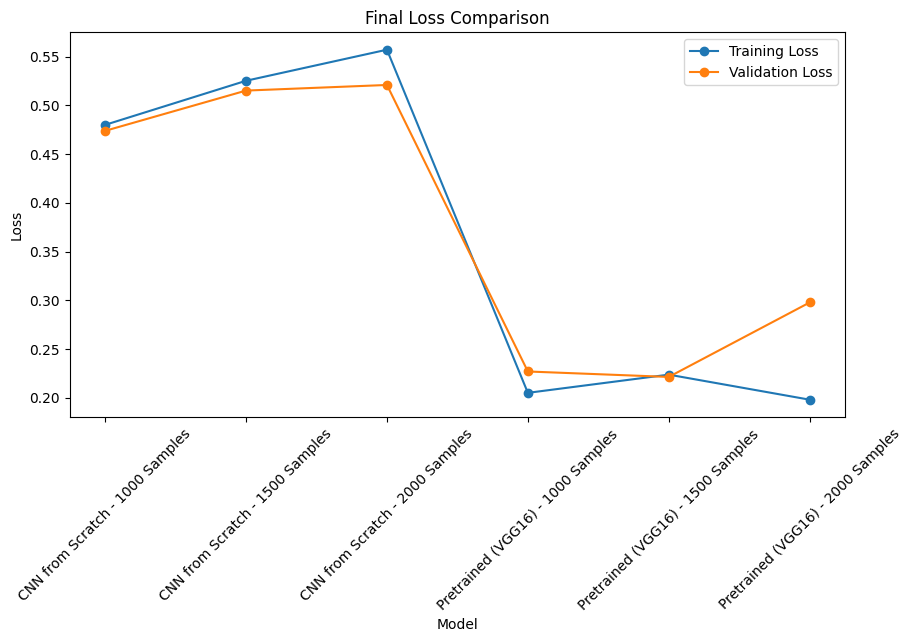

In [23]:
# Function to visually compare CNN model performances based on accuracy and loss

def compare_models(results_summary):
    model_names = list(results_summary.keys())
    train_acc = [results_summary[name]['Final Training Accuracy'] for name in model_names]
    val_acc = [results_summary[name]['Final Validation Accuracy'] for name in model_names]
    train_loss = [results_summary[name]['Final Training Loss'] for name in model_names]
    val_loss = [results_summary[name]['Final Validation Loss'] for name in model_names]

    # Plotting accuracy comparison

    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_acc, label='Training Accuracy', marker='o')
    plt.plot(model_names, val_acc, label='Validation Accuracy', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plotting loss comparison

    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_loss, label='Training Loss', marker='o')
    plt.plot(model_names, val_loss, label='Validation Loss', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Loss Comparison')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# Generating the final summary and visualizing the comparisons

# Aggregate all history objects and define labels for comparison
all_histories = [history_A, history_B, history_C, history_P1, history_P2, history_P3]
model_labels = ['CNN from Scratch - 1000 Samples', 'CNN from Scratch - 1500 Samples', 'CNN from Scratch - 2000 Samples',
                'Pretrained (VGG16) - 1000 Samples', 'Pretrained (VGG16) - 1500 Samples', 'Pretrained (VGG16) - 2000 Samples']

final_scores = summarize_results(all_histories, model_labels)
compare_models(final_scores)